# Clustring

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
from pycaret.utils import version
version()

'2.3.1'

In [3]:
final = pd.read_csv('final.csv')

In [4]:
dataset =final
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (295, 10)
Unseen Data For Predictions: (16, 10)


In [5]:
from pycaret.clustering import *

In [6]:
exp_clu101 = setup(data, normalize = True, 
                   session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(295, 10)"
2,Missing Values,False
3,Numeric Features,7
4,Categorical Features,3
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(295, 17)"
9,CPU Jobs,-1


In [7]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [8]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2115,59.3267,1.5983,0,0,0


In [9]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)


In [10]:
kmean_results = assign_model(kmeans)
kmean_results.head()

,Unnamed: 0,power,humidity,temperature,water_reading,co2,year,month,day,hour,Cluster
0,230,21.615385,29.5,21.92,0.0,462.0,2021,11,24,19,Cluster 3
1,82,21.111111,26.0,21.86,0.0,403.0,2021,11,21,11,Cluster 0
2,142,21.416667,23.5,21.21,0.0,427.0,2021,11,22,19,Cluster 0
3,45,21.500000,27.5,21.80,0.0,399.0,2021,11,20,16,Cluster 0
4,39,21.166667,27.5,21.24,0.0,411.0,2021,11,20,12,Cluster 0


In [11]:
#kmodes = create_model('kmodes', num_clusters = 2)

In [12]:
#plot_model(kmeans)

In [13]:
plot_model(kmeans, plot = 'cluster')

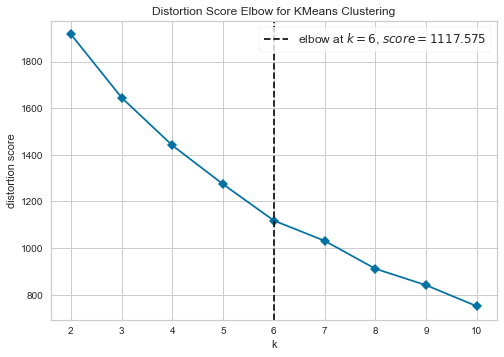

In [14]:
plot_model(kmeans, plot = 'elbow')

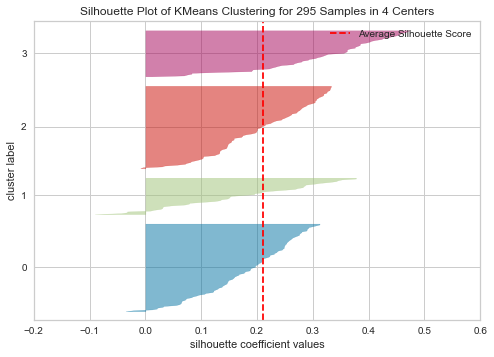

In [15]:
plot_model(kmeans, plot = 'silhouette')

In [16]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)

In [27]:
unseen_predictions = predict_model(kmeans, data=data_unseen)
unseen_predictions

,Unnamed: 0,power,humidity,temperature,water_reading,co2,year,month,day,hour,Cluster
0,5,21.300000,37.5,21.94,0.000000,447.0,2021,11,19,18,Cluster 0
1,20,21.153846,31.5,20.84,0.000000,418.0,2021,11,20,2,Cluster 0
2,52,198.500000,29.0,21.99,0.000000,396.0,2021,11,20,19,Cluster 0
3,87,238.250000,26.0,21.93,0.000000,402.0,2021,11,21,13,Cluster 0
4,103,212.333333,23.5,21.76,0.000000,400.0,2021,11,21,22,Cluster 0
5,132,268.857143,22.0,21.37,0.000000,491.0,2021,11,22,15,Cluster 1
6,176,21.400000,23.5,21.76,0.000000,504.0,2021,11,23,14,Cluster 1
7,202,21.300000,27.0,21.70,0.000000,414.0,2021,11,24,4,Cluster 2
8,215,21.500000,30.0,21.76,0.525702,515.0,2021,11,24,11,Cluster 1
9,221,21.500000,31.0,21.84,0.737222,520.0,2021,11,24,14,Cluster 1


In [22]:
final.columns

Index(['Unnamed: 0', 'power', 'humidity', 'temperature', 'water_reading',
       'co2', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [20]:
# list of numerical variables
numerical_features = [feature for feature in final.columns if final[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
final[numerical_features].head()

Number of numerical variables:  10


,Unnamed: 0,power,humidity,temperature,water_reading,co2,year,month,day,hour
0,0,21.000000,40.0,22.40,0.0,515.0,2021,11,19,15
1,1,21.500000,39.5,22.42,0.0,515.0,2021,11,19,16
2,2,198.200000,39.0,22.42,0.0,488.0,2021,11,19,16
3,3,21.454545,38.5,22.32,0.0,460.0,2021,11,19,17
4,4,21.357143,38.0,22.12,0.0,449.0,2021,11,19,17


In [23]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(final[feature].unique())<25 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
print(discrete_feature)

Discrete Variables Count: 4
['year', 'month', 'day', 'hour']


In [24]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))
print(continuous_feature)

Continuous feature Count 6
['Unnamed: 0', 'power', 'humidity', 'temperature', 'water_reading', 'co2']


In [26]:
categorical_features=[feature for feature in final.columns if final[feature].dtypes=='O']
categorical_features

[]